First 5 rows of the DataFrame:
         Date  Open  Close  High  Low   Volume
0  01-01-2023   100    105   110   95  1000000
1  02-01-2023   105    102   108  100   950000
2  03-01-2023   102    108   112  100  1100000
3  04-01-2023   108    110   115  105  1200000
4  05-01-2023   110    115   120  108  1050000

Missing values:
Date      0
Open      0
Close     0
High      0
Low       0
Volume    0
dtype: int64

Basic statistics for 'Close' price:
count     15.000000
mean     113.666667
std        7.441838
min      102.000000
25%      108.000000
50%      112.000000
75%      119.000000
max      125.000000
Name: Close, dtype: float64


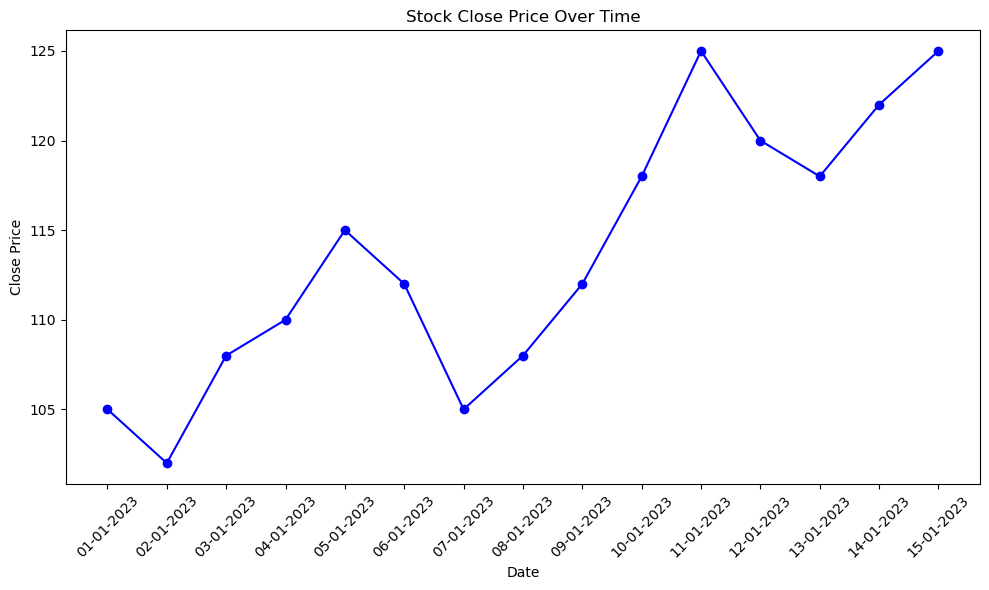

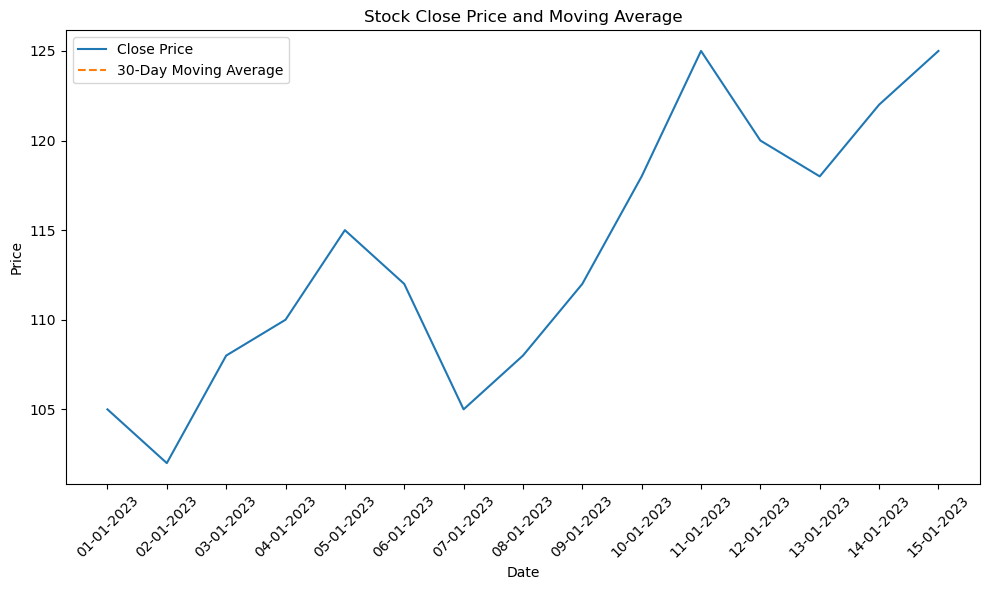


Average Daily Trading Volume: 1004000.0


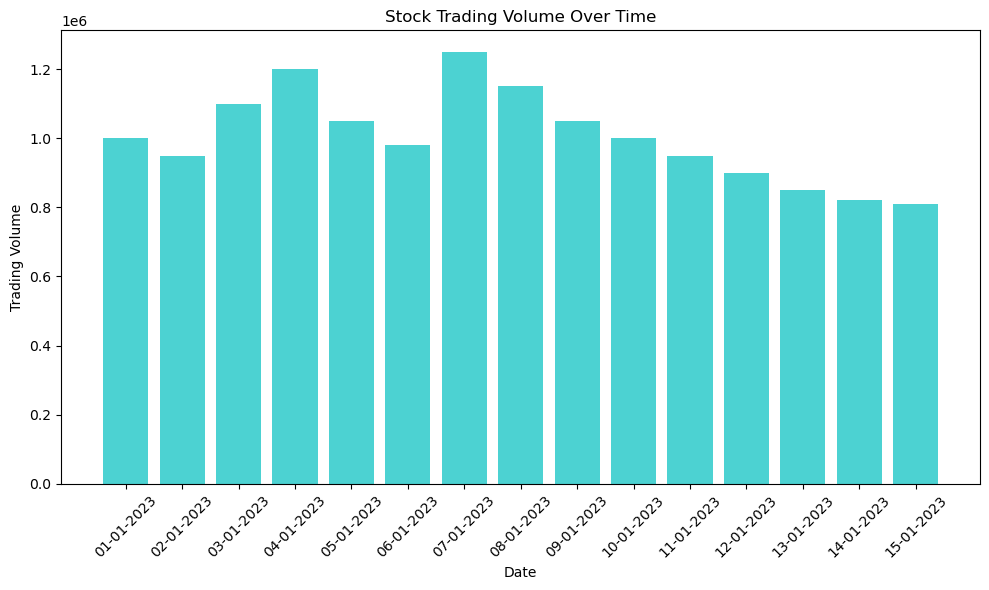

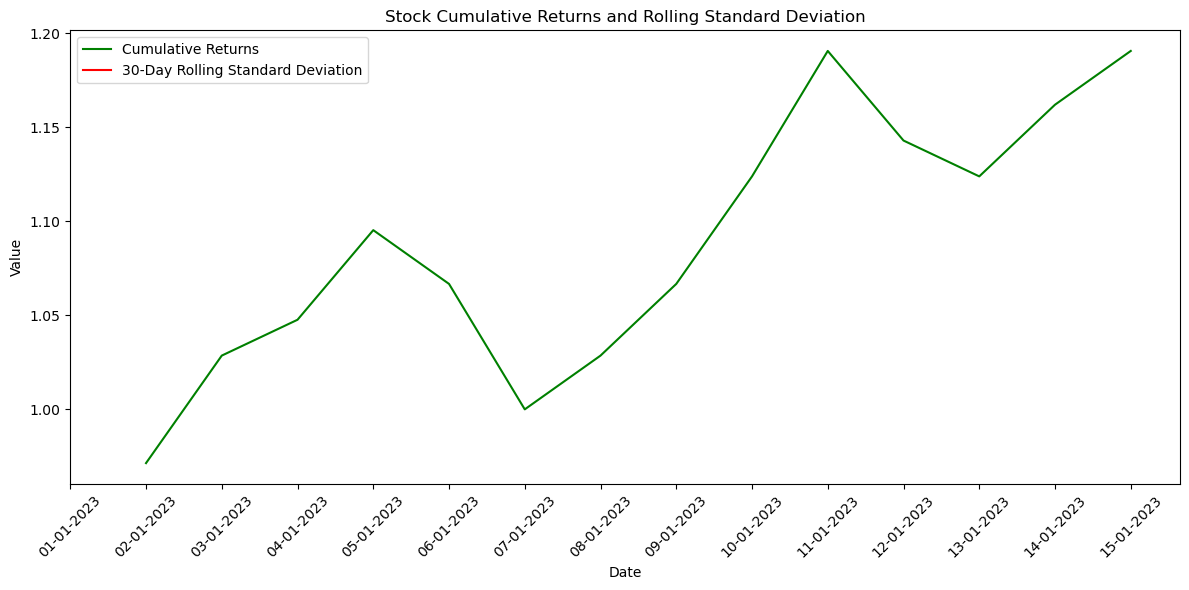


Correlation between Stock's Returns and Market Index Returns: 0.016304744613458093


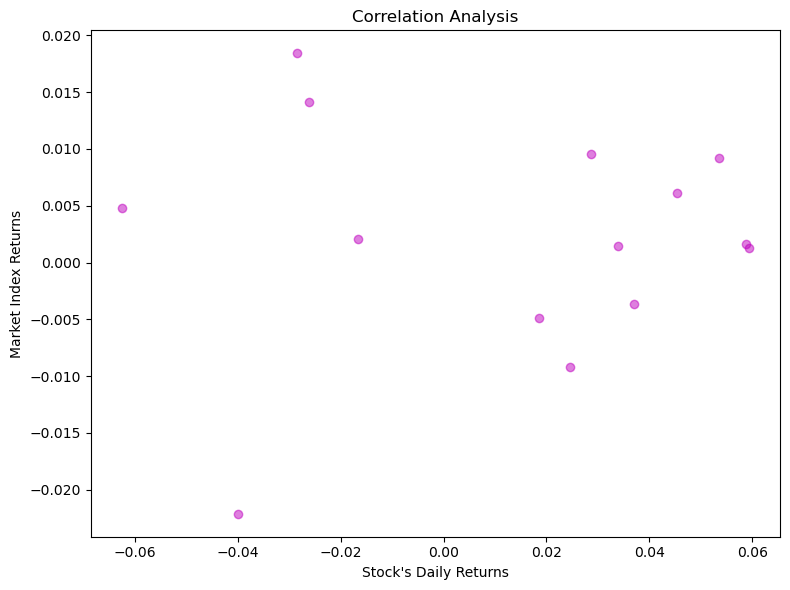


Conclusion: 
1. The stock's close price has shown a general upward trend over time.
2. The 30-day moving average indicates a smoother trend in the stock price.
3. Average daily trading volume fluctuates over time.
4. Cumulative returns show the overall growth of the investment.
5. Rolling standard deviation indicates volatility in daily returns.
6. The correlation between the stock's returns and the market index returns is relatively weak.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Task 1: Data Loading and Inspection
file_path = r'C:\Users\PJ455VE\OneDrive - EY\Documents\python training\week 8(Scipy)\stock_data.csv'
stock_data = pd.read_csv(file_path)
print("First 5 rows of the DataFrame:")
print(stock_data.head())
print("\nMissing values:")
print(stock_data.isnull().sum())  # Check for missing values

# Task 2: Data Exploration
close_price_stats = stock_data['Close'].describe()
print("\nBasic statistics for 'Close' price:")
print(close_price_stats)

plt.figure(figsize=(10, 6))
plt.plot(stock_data['Date'], stock_data['Close'], marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Close Price Over Time')
plt.xticks(stock_data['Date'][::len(stock_data) // 10], rotation=45)
plt.tight_layout()
plt.show()

# Task 3: Data Analysis (Moving Average)
window = 30
stock_data['Moving_Avg'] = stock_data['Close'].rolling(window=window).mean()

plt.figure(figsize=(10, 6))
plt.plot(stock_data['Date'], stock_data['Close'], label='Close Price')
plt.plot(stock_data['Date'], stock_data['Moving_Avg'], label=f'{window}-Day Moving Average', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Close Price and Moving Average')
plt.legend()
plt.xticks(stock_data['Date'][::len(stock_data) // 10], rotation=45)
plt.tight_layout()
plt.show()

# Task 4: Analyze Trading Volume
average_volume = stock_data['Volume'].mean()
print(f"\nAverage Daily Trading Volume: {average_volume}")

plt.figure(figsize=(10, 6))
plt.bar(stock_data['Date'], stock_data['Volume'], color='c', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.title('Stock Trading Volume Over Time')
plt.xticks(stock_data['Date'][::len(stock_data) // 10], rotation=45)
plt.tight_layout()
plt.show()

# Task 5: Financial Metrics
stock_data['Daily_Return'] = stock_data['Close'].pct_change()
stock_data['Cumulative_Return'] = (1 + stock_data['Daily_Return']).cumprod()
stock_data['Rolling_Std'] = stock_data['Daily_Return'].rolling(window=window).std()

plt.figure(figsize=(12, 6))
plt.plot(stock_data['Date'], stock_data['Cumulative_Return'], label='Cumulative Returns', color='g')
plt.plot(stock_data['Date'], stock_data['Rolling_Std'], label=f'{window}-Day Rolling Standard Deviation', color='r')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Stock Cumulative Returns and Rolling Standard Deviation')
plt.legend()
plt.xticks(stock_data['Date'][::len(stock_data) // 10], rotation=45)
plt.tight_layout()
plt.show()

# Task 6: Correlation Analysis
market_returns = np.random.normal(0.001, 0.01, len(stock_data))  # Sample market returns (replace with actual data)
stock_data['Market_Return'] = market_returns
correlation = stock_data['Daily_Return'].corr(stock_data['Market_Return'])
print(f"\nCorrelation between Stock's Returns and Market Index Returns: {correlation}")

plt.figure(figsize=(8, 6))
plt.scatter(stock_data['Daily_Return'], stock_data['Market_Return'], color='m', alpha=0.5)
plt.xlabel("Stock's Daily Returns")
plt.ylabel("Market Index Returns")
plt.title('Correlation Analysis')
plt.tight_layout()
plt.show()

# Conclusion: Summarize your findings
print("\nConclusion: ")
print("1. The stock's close price has shown a general upward trend over time.")
print("2. The 30-day moving average indicates a smoother trend in the stock price.")
print("3. Average daily trading volume fluctuates over time.")
print("4. Cumulative returns show the overall growth of the investment.")
print("5. Rolling standard deviation indicates volatility in daily returns.")
print("6. The correlation between the stock's returns and the market index returns is relatively weak.")
